Importing Libraries and Data Set

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'E:\My ML Projects\E-Commerce\Ecommerce Customers')

In [6]:
df.head(3).T

,0,1,2
Email,mstephenson@fernandez.com,hduke@hotmail.com,pallen@yahoo.com
Address,"835 Frank Tunnel\nWrightmouth, MI 82180-9605","4547 Archer Common\nDiazchester, CA 06566-8576","24645 Valerie Unions Suite 582\nCobbborough, D..."
Avatar,Violet,DarkGreen,Bisque
Avg. Session Length,34.497268,31.926272,33.000915
Time on App,12.655651,11.109461,11.330278
Time on Website,39.577668,37.268959,37.110597
Length of Membership,4.082621,2.664034,4.104543
Yearly Amount Spent,587.951054,392.204933,487.547505


In [7]:
df.shape

(500, 8)

In [10]:
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [11]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Email,500,500,mstephenson@fernandez.com,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Address,500,500,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avatar,500,138,SlateBlue,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg. Session Length,500.0,NaN,NaN,NaN,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,NaN,NaN,NaN,12.052488,0.994216,8.508152,11.388153,11.983231,12.75385,15.126994
Time on Website,500.0,NaN,NaN,NaN,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,NaN,NaN,NaN,3.533462,0.999278,0.269901,2.93045,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,NaN,NaN,NaN,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


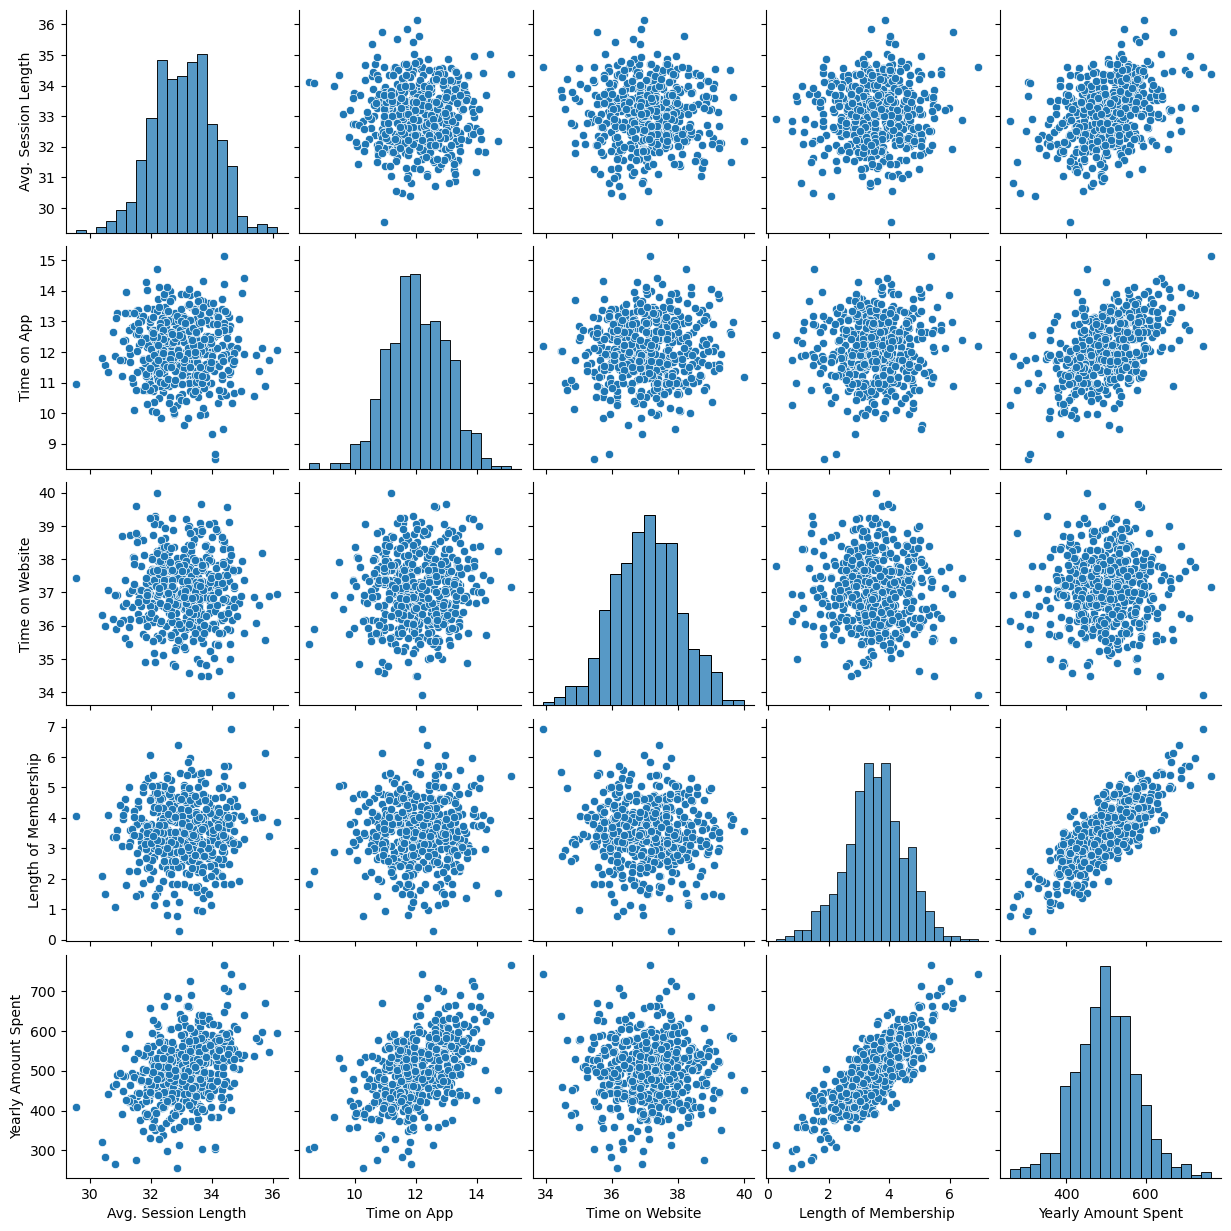

In [14]:
sns.pairplot(data=df)

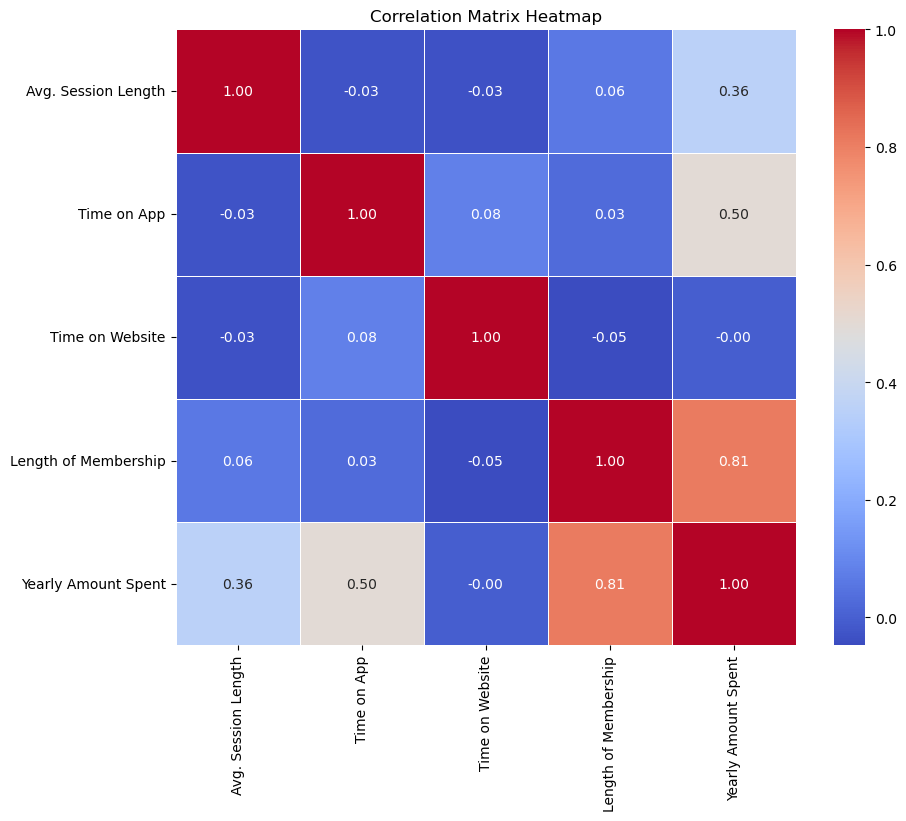

In [15]:

numerical_df = df.select_dtypes(include=['float'])

# 1. Compute the correlation matrix
corr_matrix = numerical_df.corr()

# 2. Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

Randomly Spliting Data Set into Training and Testing.

In [16]:
from sklearn.model_selection import train_test_split

In [49]:
X = df[['Avg. Session Length', 'Time on App', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

Training Model

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
# The coefficients in a dataframe
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.830455
Time on App           38.836992
Length of Membership  61.285268


Predicting

In [55]:
predictions = lm.predict(X_test)

Text(0.5, 1.0, 'Yearly Amount Spent vs. Model Predictions')

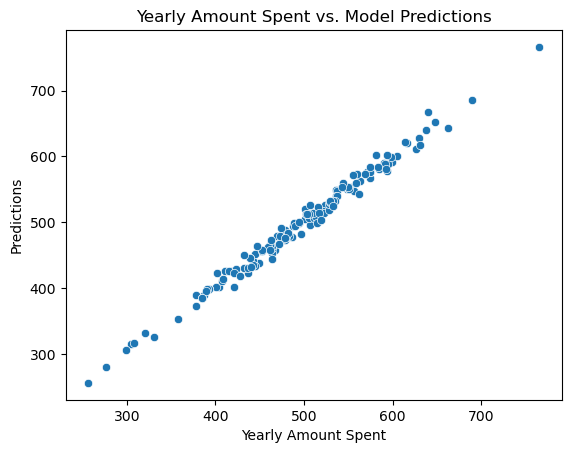

In [56]:
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x=y_test, y=predictions)
plt.ylabel('Predictions')
plt.title('Yearly Amount Spent vs. Model Predictions')

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [58]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 7.111034726738203
Mean Squared Error: 81.31178073510002
Root Mean Squared Error: 9.017304516045803


In [65]:
residuals = y_test-predictions

In [62]:
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Residual': residuals
})
print(results_df.head(10))


         Actual   Predicted   Residual
304  494.687156  498.983398  -4.296242
340  501.122492  519.696778 -18.574287
47   563.672873  563.142970   0.529904
67   469.310861  479.104692  -9.793831
479  402.167122  423.560446 -21.393324
485  515.502480  509.162616   6.339863
310  479.614812  478.938987   0.675825
31   447.687907  460.466845 -12.778938
249  518.786483  519.454068  -0.667585
90   449.070319  438.941487  10.128832


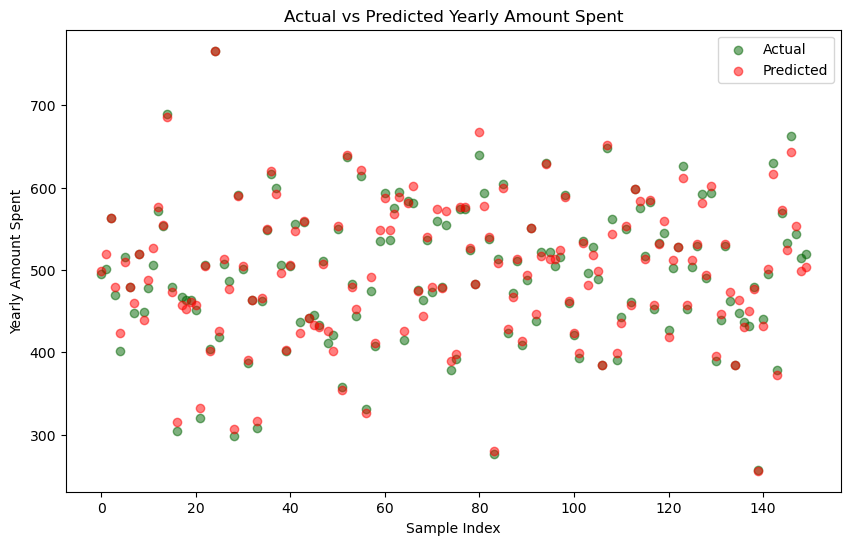

In [66]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='darkgreen', alpha=0.5, label='Actual')
plt.scatter(range(len(predictions)), predictions, color='red', alpha=0.5, label='Predicted')

plt.xlabel('Sample Index')
plt.ylabel('Yearly Amount Spent')
plt.title('Actual vs Predicted Yearly Amount Spent')
plt.legend()
plt.show()

<Axes: >

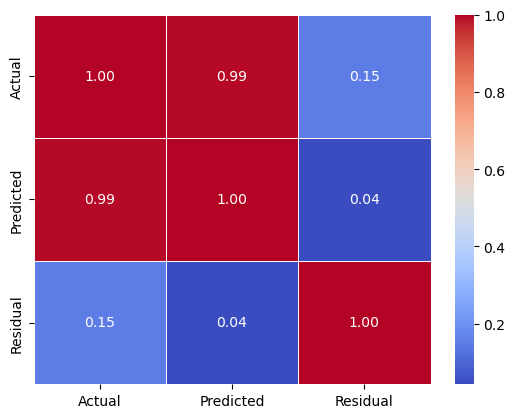

In [67]:
sns.heatmap(results_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [ ]:
# Define the features in order
features = ['Avg. Session Length', 'Time on App', 'Length of Membership']

# Collect user input for each feature
user_input = []

for feature in features:
    value = float(input(f"Enter value for {feature}: "))
    user_input.append(value)

# Convert to numpy array and reshape
input_array = np.array(user_input).reshape(1, -1)

# Predict
prediction = lm.predict(input_array)   # ← changed here from model.predict

# Output the result
print(f"\nPredicted Yearly Amount Spent: ${prediction[0]:.2f}")



✅ Predicted Yearly Amount Spent: $5871.77


c:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
